# Final Project Report

* Class: DS 5100
* Student Name:William Rumph 
* Student Net ID:usp7bf
* This URL: (https://github.com/1wgrumph/montecarloprojectds5100)

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/1wgrumph/montecarloprojectds5100

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [1]:
'''import numpy as np
import pandas as pd


class Die:
    """
    A class representing a die with customizable faces and weights.
    """

    def __init__(self, faces):
        """
        Initialize the die with unique faces and default weights of 1.0.

        :param faces: A list or array of unique faces.
        """
        self.faces = np.array(faces)
        self.weights = np.ones(len(faces), dtype=float)
        self._die_df = pd.DataFrame({'Face': self.faces, 'Weight': self.weights})

    def change_weight(self, face, new_weight):
        """
        Change the weight of a specific face.

        :param face: The face of the die to update.
        :param new_weight: The new weight (must be numeric).
        """
        if face not in self.faces:
            raise ValueError("Face not found in die.")
        if not isinstance(new_weight, (int, float)):
            raise ValueError("Weight must be a numeric value.")
        self._die_df.loc[self._die_df['Face'] == face, 'Weight'] = float(new_weight)

    def roll(self, n_rolls=1):
        """
        Roll the die n times.

        :param n_rolls: The number of rolls.
        :return: A list of outcomes.
        """
        return self._die_df['Face'].sample(n=n_rolls, weights=self._die_df['Weight'], replace=True).tolist()

    def show(self):
        """
        Show the current state of the die.

        :return: A DataFrame showing faces and weights.
        """
        return self._die_df.copy()


class Game:
    """
    A class representing a game involving one or more dice.
    """

    def __init__(self, dice):
        """
        Initialize the game with a list of dice.

        :param dice: A list of Die objects.
        """
        if not all(isinstance(die, Die) for die in dice):
            raise ValueError("All elements must be instances of the Die class.")
        self.dice = dice
        self._results = None

    def play(self, n_rolls):
        """
        Play the game by rolling all dice n times.

        :param n_rolls: The number of rolls.
        """
        results = {f"Die {i+1}": die.roll(n_rolls) for i, die in enumerate(self.dice)}
        self._results = pd.DataFrame(results)

    def show(self, form="wide"):
        """
        Show the results of the most recent game.

        :param form: "wide" for wide format, "narrow" for narrow format.
        :return: A DataFrame of results.
        """
        if self._results is None:
            raise ValueError("No results available. Play the game first.")
        if form == "wide":
            return self._results
        elif form == "narrow":
            return self._results.melt(var_name="Die", value_name="Outcome")
        else:
            raise ValueError("Form must be 'wide' or 'narrow'.")


class Analyzer:
    """
    A class for analyzing the results of a game.
    """

    def __init__(self, game):
        """
        Initialize the analyzer with a game object.

        :param game: A Game object.
        """
        if not isinstance(game, Game):
            raise ValueError("Input must be an instance of the Game class.")
        self.game = game
        self.results = game.show("wide")

    def jackpot(self):
        """
        Count how many rolls resulted in all dice showing the same face.

        :return: An integer count of jackpots.
        """
        return (self.results.nunique(axis=1) == 1).sum()

    def face_counts_per_roll(self):
        """
        Count the occurrences of each face in each roll.

        :return: A DataFrame of face counts.
        """
        return self.results.apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)

    def combo_count(self):
        """
        Count distinct combinations of faces rolled.

        :return: A DataFrame of combinations and their counts.
        """
        combos = self.results.apply(lambda x: tuple(sorted(x)), axis=1)
        return combos.value_counts().reset_index(name="Count").rename(columns={"index": "Combination"})

    def permutation_count(self):
        """
        Count distinct permutations of faces rolled.

        :return: A DataFrame of permutations and their counts.
        """
        perms = self.results.apply(tuple, axis=1)
        return perms.value_counts().reset_index(name="Count").rename(columns={"index": "Permutation"})

    def valid_words(self, scrabble_words_file):
        """
        Count valid Scrabble words formed by letter permutations.

        :param scrabble_words_file: Path to the Scrabble words file.
        :return: A DataFrame of valid words and their counts.
        """
        # Load valid words
        with open(scrabble_words_file, 'r') as file:
            valid_words = set(word.strip().upper() for word in file.readlines())

        # Check permutations
        def find_valid_words(row):
            return [word for word in set(row) if word in valid_words]

        permutations = self.results.apply(tuple, axis=1)
        valid = permutations.apply(find_valid_words).explode()
        return valid.value_counts().reset_index(name="Count").rename(columns={"index": "Valid Word"})


# Example: Loading `english_letters.txt` and creating a weighted alphabet die
def load_alphabet_die(file_path):
    """
    Create a Die instance for the English alphabet weighted by letter frequency.

    :param file_path: Path to the `english_letters.txt` file.
    :return: A Die object.
    """
    letter_weights = pd.read_csv(file_path, sep=" ", header=None, names=["Letter", "Frequency"])
    letter_weights["Weight"] = letter_weights["Frequency"] / letter_weights["Frequency"].sum()
    alphabet_die = Die(letter_weights["Letter"].values)
    for letter, weight in zip(letter_weights["Letter"], letter_weights["Weight"]):
        alphabet_die.change_weight(letter, weight)
    return alphabet_die
'''

'import numpy as np\nimport pandas as pd\n\n\nclass Die:\n    """\n    A class representing a die with customizable faces and weights.\n    """\n\n    def __init__(self, faces):\n        """\n        Initialize the die with unique faces and default weights of 1.0.\n\n        :param faces: A list or array of unique faces.\n        """\n        self.faces = np.array(faces)\n        self.weights = np.ones(len(faces), dtype=float)\n        self._die_df = pd.DataFrame({\'Face\': self.faces, \'Weight\': self.weights})\n\n    def change_weight(self, face, new_weight):\n        """\n        Change the weight of a specific face.\n\n        :param face: The face of the die to update.\n        :param new_weight: The new weight (must be numeric).\n        """\n        if face not in self.faces:\n            raise ValueError("Face not found in die.")\n        if not isinstance(new_weight, (int, float)):\n            raise ValueError("Weight must be a numeric value.")\n        self._die_df.loc[self.

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [2]:
'''# A code block with your test code.

import unittest
import pandas as pd
import numpy as np
from montecarlo import Die, Game, Analyzer, load_alphabet_die


class TestDie(unittest.TestCase):

    def setUp(self):
        self.die = Die(['A', 'B', 'C'])

    def test_initial_weights(self):
        self.assertTrue((self.die._die_df['Weight'] == 1.0).all())
        print("TestDie: test_initial_weights passed")

    def test_change_weight(self):
        self.die.change_weight('A', 2.5)
        self.assertEqual(self.die._die_df.loc[self.die._die_df['Face'] == 'A', 'Weight'].values[0], 2.5)
        print("TestDie: test_change_weight passed")

    def test_invalid_weight_change(self):
        with self.assertRaises(ValueError):
            self.die.change_weight('D', 2.0)
        print("TestDie: test_invalid_weight_change passed")

    def test_roll(self):
        rolls = self.die.roll(5)
        self.assertEqual(len(rolls), 5)
        self.assertTrue(set(rolls).issubset({'A', 'B', 'C'}))
        print("TestDie: test_roll passed")

    def test_show(self):
        df = self.die.show()
        self.assertIsInstance(df, pd.DataFrame)
        self.assertEqual(len(df), 3)
        print("TestDie: test_show passed")


class TestGame(unittest.TestCase):

    def setUp(self):
        self.dice = [Die(['A', 'B', 'C']) for _ in range(3)]
        self.game = Game(self.dice)

    def test_play(self):
        self.game.play(10)
        self.assertEqual(len(self.game._results), 10)
        print("TestGame: test_play passed")

    def test_show_wide(self):
        self.game.play(5)
        results = self.game.show('wide')
        self.assertEqual(results.shape[0], 5)
        print("TestGame: test_show_wide passed")

    def test_show_narrow(self):
        self.game.play(5)
        results = self.game.show('narrow')
        self.assertEqual(len(results), 15)  # 5 rolls * 3 dice
        print("TestGame: test_show_narrow passed")


class TestAnalyzer(unittest.TestCase):

    def setUp(self):
        dice = [Die(['A', 'B', 'C']) for _ in range(3)]
        self.game = Game(dice)
        self.game.play(10)
        self.analyzer = Analyzer(self.game)

    def test_jackpot(self):
        jackpots = self.analyzer.jackpot()
        self.assertGreaterEqual(jackpots, 0)
        print("TestAnalyzer: test_jackpot passed")

    def test_face_counts_per_roll(self):
        face_counts = self.analyzer.face_counts_per_roll()
        self.assertIsInstance(face_counts, pd.DataFrame)
        self.assertEqual(face_counts.shape[0], 10)
        print("TestAnalyzer: test_face_counts_per_roll passed")

    def test_combo_count(self):
        combos = self.analyzer.combo_count()
        self.assertIsInstance(combos, pd.DataFrame)
        print("TestAnalyzer: test_combo_count passed")

    def test_permutation_count(self):
        permutations = self.analyzer.permutation_count()
        self.assertIsInstance(permutations, pd.DataFrame)
        print("TestAnalyzer: test_permutation_count passed")


class TestIntegration(unittest.TestCase):

    def test_alphabet_die_creation(self):
        alphabet_die = load_alphabet_die('english_letters.txt')
        self.assertIsInstance(alphabet_die, Die)
        self.assertEqual(len(alphabet_die.show()), 26)
        print("TestIntegration: test_alphabet_die_creation passed")

    def test_valid_words(self):
        alphabet_die = load_alphabet_die('english_letters.txt')
        dice = [alphabet_die for _ in range(5)]
        game = Game(dice)
        game.play(10)
        analyzer = Analyzer(game)
        valid_words = analyzer.valid_words('scrabble_words.txt')
        self.assertIsInstance(valid_words, pd.DataFrame)
        print("TestIntegration: test_valid_words passed")


if __name__ == '__main__':
    unittest.main()
'''


'# A code block with your test code.\n\nimport unittest\nimport pandas as pd\nimport numpy as np\nfrom montecarlo import Die, Game, Analyzer, load_alphabet_die\n\n\nclass TestDie(unittest.TestCase):\n\n    def setUp(self):\n        self.die = Die([\'A\', \'B\', \'C\'])\n\n    def test_initial_weights(self):\n        self.assertTrue((self.die._die_df[\'Weight\'] == 1.0).all())\n        print("TestDie: test_initial_weights passed")\n\n    def test_change_weight(self):\n        self.die.change_weight(\'A\', 2.5)\n        self.assertEqual(self.die._die_df.loc[self.die._die_df[\'Face\'] == \'A\', \'Weight\'].values[0], 2.5)\n        print("TestDie: test_change_weight passed")\n\n    def test_invalid_weight_change(self):\n        with self.assertRaises(ValueError):\n            self.die.change_weight(\'D\', 2.0)\n        print("TestDie: test_invalid_weight_change passed")\n\n    def test_roll(self):\n        rolls = self.die.roll(5)\n        self.assertEqual(len(rolls), 5)\n        self.asse

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

# Test importing the montecarlo module
from montecarlo import Die, Game, Analyzer, load_alphabet_die

print("Module 'montecarlo' imported successfully!")


In [3]:
# e.g. import montecarlo.montecarlo 

# Import the montecarlo module
from montecarlo import Die, Game, Analyzer, load_alphabet_die

# Confirm successful import
print("Module 'montecarlo' successfully imported!")


Module 'montecarlo' successfully imported!


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [4]:
# Import the montecarlo module
from montecarlo import Die, Game, Analyzer, load_alphabet_die

# Show module-level help
print("Module Help:")
help("montecarlo")

# Show class-level and method-level help
print("\nDie Class Help:")
help(Die)

print("\nGame Class Help:")
help(Game)

print("\nAnalyzer Class Help:")
help(Analyzer)

print("\nFunction Help (load_alphabet_die):")
help(load_alphabet_die)


Module Help:
Help on module montecarlo:

NAME
    montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  A class for analyzing the results of a game.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Initialize the analyzer with a game object.
     |      
     |      :param game: A Game object.
     |  
     |  combo_count(self)
     |      Count distinct combinations of faces rolled.
     |      
     |      :return: A DataFrame of combinations and their counts.
     |  
     |  face_counts_per_roll(self)
     |      Count the occurrences of each face in each roll.
     |      
     |      :return: A DataFrame of face counts.
     |  
     |  jackpot(self)
     |      Count how many rolls resulted in all dice showing the same face.
     |      
     |      :return: An integer count of jackpots.
     |  
     |  permutation_count(self)
    

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/1wgrumph/montecarloprojectds5100/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [5]:
from montecarlo import Die

# Create a fair coin with faces H (Heads) and T (Tails)
fair_coin = Die(['H', 'T'])
print("Fair coin created:")
print(fair_coin.show())

# Create an unfair coin where face H has weight 5 and T has weight 1
unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5)
print("\nUnfair coin created:")
print(unfair_coin.show())


Fair coin created:
  Face  Weight
0    H     1.0
1    T     1.0

Unfair coin created:
  Face  Weight
0    H     5.0
1    T     1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [6]:
from montecarlo import Die, Game

# Create two fair coins
fair_coin1 = Die(['H', 'T'])
fair_coin2 = Die(['H', 'T'])

# Initialize a game with two fair coins
game = Game([fair_coin1, fair_coin2])

# Play the game with 1,000 flips
game.play(1000)

# Display the first few results of the game
print("First 10 results of the game:")
print(game.show('wide').head(10))


First 10 results of the game:
  Die 1 Die 2
0     T     H
1     H     T
2     T     H
3     H     H
4     H     H
5     H     T
6     T     T
7     H     H
8     T     H
9     H     T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [7]:
from montecarlo import Die, Game

# Create a fair die
fair_die = Die(['H', 'T'])

# Create an unfair die where 'H' has weight 5 and 'T' has weight 1
unfair_die = Die(['H', 'T'])
unfair_die.change_weight('H', 5)

# Initialize a new game with two unfair dice (reusing one die) and one fair die
new_game = Game([unfair_die, unfair_die, fair_die])

# Play the game with 1,000 flips
new_game.play(1000)

# Display the first few results of the game
print("First 10 results of the new game:")
print(new_game.show('wide').head(10))


First 10 results of the new game:
  Die 1 Die 2 Die 3
0     T     H     H
1     H     H     T
2     H     H     H
3     H     H     H
4     H     T     H
5     H     H     H
6     H     H     H
7     H     H     H
8     H     H     T
9     H     H     H


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [8]:
from montecarlo import Analyzer

# Analyze the first game (two fair dice)
analyzer_game1 = Analyzer(game)
jackpots_game1 = analyzer_game1.jackpot()
print(f"Raw frequency of jackpots in the first game: {jackpots_game1}")

# Analyze the second game (two unfair dice and one fair die)
analyzer_game2 = Analyzer(new_game)
jackpots_game2 = analyzer_game2.jackpot()
print(f"Raw frequency of jackpots in the second game: {jackpots_game2}")


Raw frequency of jackpots in the first game: 537
Raw frequency of jackpots in the second game: 357


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [9]:
# Compute relative frequency for the first game (two fair dice)
relative_frequency_game1 = jackpots_game1 / 1000  # 1000 rolls in the first game
print(f"Relative frequency of jackpots in the first game: {relative_frequency_game1:.4f}")

# Compute relative frequency for the second game (two unfair dice and one fair die)
relative_frequency_game2 = jackpots_game2 / 1000  # 1000 rolls in the second game
print(f"Relative frequency of jackpots in the second game: {relative_frequency_game2:.4f}")


Relative frequency of jackpots in the first game: 0.5370
Relative frequency of jackpots in the second game: 0.3570


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

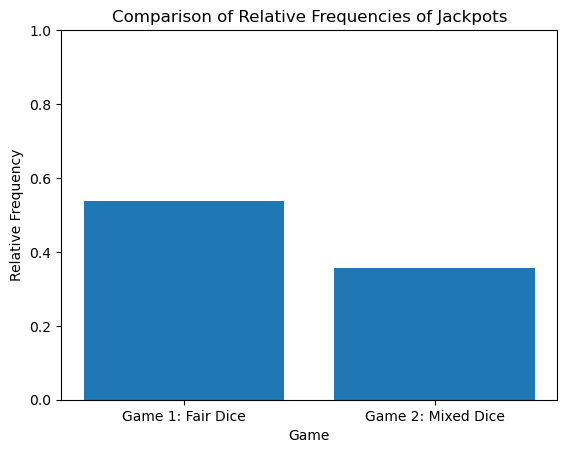

In [10]:
import matplotlib.pyplot as plt

# Data for the bar chart
games = ['Game 1: Fair Dice', 'Game 2: Mixed Dice']
relative_frequencies = [relative_frequency_game1, relative_frequency_game2]

# Plotting the bar chart
plt.bar(games, relative_frequencies)
plt.title('Comparison of Relative Frequencies of Jackpots')
plt.ylabel('Relative Frequency')
plt.xlabel('Game')
plt.ylim(0, 1)  # Setting y-axis limits for better visualization
plt.show()


## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [11]:
from montecarlo import Die

# Create three 6-sided dice
die1 = Die([1, 2, 3, 4, 5, 6])
die2 = Die([1, 2, 3, 4, 5, 6])
die3 = Die([1, 2, 3, 4, 5, 6])

# Display the state of the first die to confirm
print("State of the first die:")
print(die1.show())


State of the first die:
   Face  Weight
0     1     1.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [12]:
# Convert the first die to an unfair die
die1.change_weight(6, 5)

# Display the state of the unfair die to confirm
print("State of the unfair die:")
print(die1.show())


State of the unfair die:
   Face  Weight
0     1     1.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [13]:
# Convert the second die to an unfair die
die2.change_weight(1, 5)

# Display the state of the unfair die to confirm
print("State of the second unfair die:")
print(die2.show())


State of the second unfair die:
   Face  Weight
0     1     5.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
from montecarlo import Die, Game

# Create 5 fair dice
fair_dice = [Die([1, 2, 3, 4, 5, 6]) for _ in range(5)]

# Initialize a game with the 5 fair dice
game = Game(fair_dice)

# Play the game with 10,000 rolls
game.play(10000)

# Display the first few results of the game to confirm
print("First 10 results of the game:")
print(game.show('wide').head(10))


First 10 results of the game:
   Die 1  Die 2  Die 3  Die 4  Die 5
0      1      5      2      1      1
1      3      3      3      6      4
2      1      2      5      2      4
3      5      2      5      5      2
4      6      4      4      1      4
5      4      2      3      1      3
6      4      6      3      3      6
7      6      6      6      2      3
8      4      1      1      4      3
9      4      3      6      4      2


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [15]:
# Create 3 additional fair dice
fair_dice = [Die([1, 2, 3, 4, 5, 6]) for _ in range(3)]

# Initialize a new game with 2 unfair dice and 3 fair dice
new_game = Game([die1, die2] + fair_dice)

# Play the game with 10,000 rolls
new_game.play(10000)

# Display the first few results of the new game to confirm
print("First 10 results of the new game:")
print(new_game.show('wide').head(10))


First 10 results of the new game:
   Die 1  Die 2  Die 3  Die 4  Die 5
0      6      1      3      6      1
1      6      3      5      2      5
2      3      3      6      6      1
3      6      1      3      2      1
4      3      4      1      4      3
5      1      1      4      3      1
6      6      5      6      4      4
7      6      1      2      4      2
8      2      2      5      6      1
9      6      1      4      2      2


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Relative frequency of jackpots in the first game: 0.0005
Relative frequency of jackpots in the second game: 0.0007


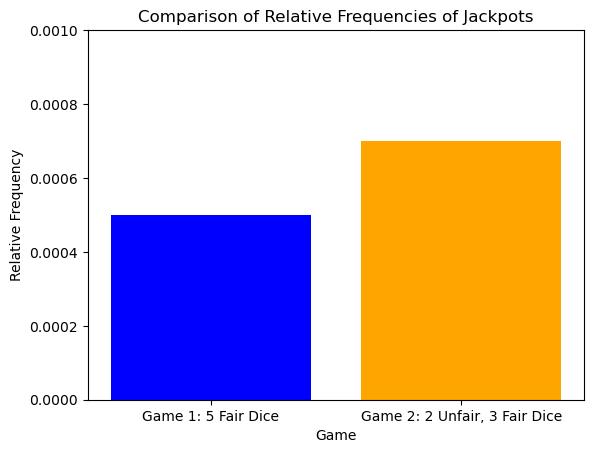

In [16]:
from montecarlo import Analyzer
import matplotlib.pyplot as plt

# Analyze the first game (5 fair dice)
analyzer_game1 = Analyzer(game)
jackpots_game1 = analyzer_game1.jackpot()
relative_frequency_game1 = jackpots_game1 / 10000  # 10,000 rolls in the first game
print(f"Relative frequency of jackpots in the first game: {relative_frequency_game1:.4f}")

# Analyze the second game (2 unfair dice and 3 fair dice)
analyzer_game2 = Analyzer(new_game)
jackpots_game2 = analyzer_game2.jackpot()
relative_frequency_game2 = jackpots_game2 / 10000  # 10,000 rolls in the second game
print(f"Relative frequency of jackpots in the second game: {relative_frequency_game2:.4f}")

# Compare results in a bar chart
games = ['Game 1: 5 Fair Dice', 'Game 2: 2 Unfair, 3 Fair Dice']
relative_frequencies = [relative_frequency_game1, relative_frequency_game2]

# Plot the bar chart
plt.bar(games, relative_frequencies, color=['blue', 'orange'])
plt.title('Comparison of Relative Frequencies of Jackpots')
plt.ylabel('Relative Frequency')
plt.xlabel('Game')
plt.ylim(0, 0.001)  # Set y-axis limit for better visualization
plt.show()


## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [17]:
from montecarlo import Die, load_alphabet_die

# Create a die using weights from the `english_letters.txt` file
alphabet_die = load_alphabet_die('english_letters.txt')

# Display the state of the die to confirm weights
print("State of the alphabet die:")
print(alphabet_die.show())


State of the alphabet die:
   Face    Weight
0     E  0.120965
1     T  0.089381
2     A  0.085517
3     O  0.074673
4     I  0.073251
5     N  0.071722
6     S  0.067282
7     R  0.063327
8     H  0.049557
9     L  0.042065
10    D  0.038712
11    C  0.031644
12    U  0.026816
13    M  0.025263
14    F  0.021815
15    G  0.020863
16    P  0.020662
17    W  0.018254
18    Y  0.017214
19    B  0.016048
20    V  0.010593
21    K  0.008087
22    J  0.002198
23    X  0.001914
24    Z  0.001138
25    Q  0.001040


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [18]:
from montecarlo import Game

# Create 4 alphabet dice using the previously created alphabet_die
alphabet_dice = [alphabet_die, alphabet_die, alphabet_die, alphabet_die]

# Initialize the game with 4 alphabet dice
alphabet_game = Game(alphabet_dice)

# Play the game with 1,000 rolls
alphabet_game.play(1000)

# Display the first few results of the game to confirm
print("First 10 results of the alphabet game:")
print(alphabet_game.show('wide').head(10))


First 10 results of the alphabet game:
  Die 1 Die 2 Die 3 Die 4
0     P     L     N     N
1     A     F     P     P
2     O     P     N     O
3     T     S     E     E
4     E     S     A     E
5     F     O     D     E
6     E     N     E     I
7     T     R     M     B
8     Y     N     Y     C
9     A     L     A     L


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [19]:
from montecarlo import Analyzer

# Step 1: Load the Scrabble vocabulary
with open('scrabble_words.txt', 'r') as f:
    scrabble_words = set(line.strip().lower() for line in f)

# Debugging: Print sample Scrabble words
print("Sample Scrabble words:", list(scrabble_words)[:10])

# Step 2: Create an Analyzer object for the game
alphabet_analyzer = Analyzer(alphabet_game)

# Step 3: Generate permutations
permutations = alphabet_analyzer.permutation_count()

# Debugging: Print the structure of permutations
print("Sample permutations:")
print(permutations.head(10))  # Adjust based on the data structure

# Step 4: Count valid words
valid_word_count = 0
for row in permutations['Permutation']:  # Ensure the 'Permutation' column exists
    # Convert the tuple of letters to a lowercase string
    word = ''.join(row).lower()

    # Check if the word is in the Scrabble vocabulary
    if word in scrabble_words:
        valid_word_count += 1

# Compute non-word permutations
non_word_count = len(permutations) - valid_word_count

# Output the results
print(f"Number of valid words found in the game results: {valid_word_count}")
print(f"Total permutations checked: {len(permutations)}")
print(f"Non-word permutations: {non_word_count}")


Sample Scrabble words: ['manufacturing', 'semiflexible', 'sma', 'canalled', 'lezzas', 'phylloxeras', 'recut', 'zamboorak', 'beholdings', 'blurred']
Sample permutations:
    Permutation  Count
0  (E, T, O, N)      2
1  (E, A, A, R)      2
2  (H, E, O, T)      2
3  (N, R, A, R)      2
4  (E, I, W, F)      1
5  (R, H, T, B)      1
6  (I, T, N, C)      1
7  (E, A, O, U)      1
8  (E, K, O, E)      1
9  (P, E, R, R)      1
Number of valid words found in the game results: 48
Total permutations checked: 996
Non-word permutations: 948


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [22]:
from montecarlo import Game, Analyzer
from itertools import combinations

# Load Scrabble vocabulary
with open('scrabble_words.txt', 'r') as f:
    scrabble_words = set(line.strip().lower() for line in f)

# Initialize and play the 5-dice game
five_alphabet_dice = [alphabet_die for _ in range(5)]
five_dice_game = Game(five_alphabet_dice)
five_dice_game.play(1000)

# Analyze permutations from the 5-dice game
five_dice_analyzer = Analyzer(five_dice_game)
five_dice_permutations = five_dice_analyzer.permutation_count()

# Debugging: Inspect the permutations DataFrame
print(five_dice_permutations.head())

# Count valid 5-letter Scrabble words from the permutations
valid_5_letter_words = {word for word in scrabble_words if len(word) == 5}
five_dice_valid_word_count = 0
for row in five_dice_permutations['Permutation']:  # Access the 'Permutation' column
    word = ''.join(row).lower()
    if word in valid_5_letter_words:
        five_dice_valid_word_count += 1

print(f"Number of valid 5-letter Scrabble words found with 5 dice: {five_dice_valid_word_count}")

# Analyze subsets of 4 letters from the permutations
subset_word_count = 0
for row in five_dice_permutations['Permutation']:  # Access the 'Permutation' column
    for subset in combinations(row, 4):  # Generate all 4-letter subsets
        word = ''.join(subset).lower()
        if word in scrabble_words:
            subset_word_count += 1

print(f"Number of valid words found in subsets of 4 letters from 5 dice: {subset_word_count}")


       Permutation  Count
0  (A, O, E, A, O)      2
1  (E, D, F, R, A)      1
2  (V, S, U, I, O)      1
3  (I, E, R, R, M)      1
4  (E, D, H, E, I)      1
Number of valid 5-letter Scrabble words found with 5 dice: 9
Number of valid words found in subsets of 4 letters from 5 dice: 253
